# Problem Statement

We will try to use KNN classifier (K Nearest Neighbors) to create a model that directly predicts a class for a new data point based on the features.

-->__Variables

* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

-->__Label/Target Variable

* Target

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating Dataset Model

iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['Target'] = iris.target

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
data.shape

(150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
data.duplicated().sum()

1

* Removing Duplicate value

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(149, 5)

In [14]:
# Creating another column for denoting the name of the flower.

data['Flower_name'] = data.Target.apply(lambda x : iris.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df0 = data[data.Target==0]
df1 = data[data.Target==1]
df2 = data[data.Target==2]

# Sepal Length vs Sepal Width 

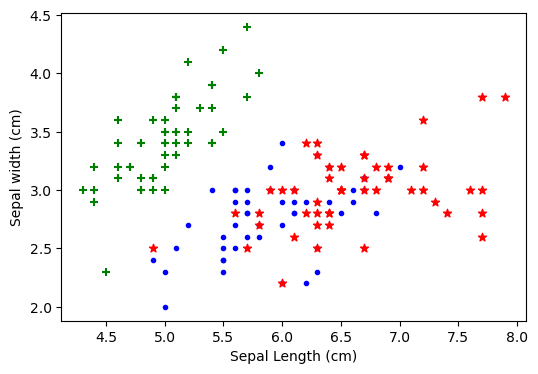

In [16]:
plt.figure(figsize=(6,4))
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal width (cm)")

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'g', marker = "+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'b', marker = ".")
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'r', marker = "*")
plt.show()

# Petal Length vs Petal Width 

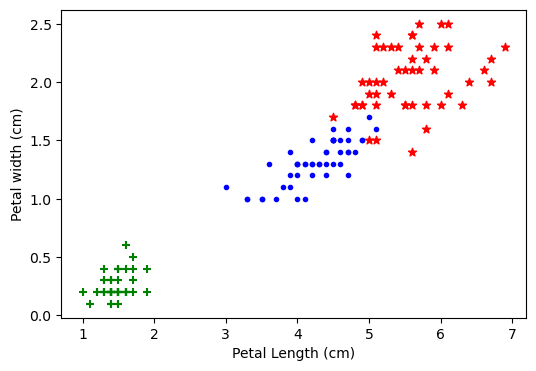

In [17]:
plt.figure(figsize=(6,4))
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal width (cm)")

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'g', marker = "+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'b', marker = ".")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'r', marker = "*")
plt.show()

In [18]:
# Divide Dataset into features and variables

X = data.drop(columns={'Target','Flower_name'})
y = data[['Target']]

# Normalizing data in KNN

* Because the KNN classifier predict the class of a given test observation by identifying the observations that are nearest to it. The scale of variable matters as any variable that are on a large scale will have a much larger effect on the distance between the observations and hence on the KNN classifier than variables that are on a small scale.

* But our Loaded IRIS Dataset is not unit less data. It is in centi-meters. So, we will not scale our dataset.

* Train-Test-Split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=35)

*  Creating Model Object

In [20]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN

KNeighborsClassifier(n_neighbors=1)

In [21]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = KNN.predict(X_test)

# Evaluation

In [24]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



# Finding best K value

* Lets go ahead and use the Elbow method to choose the good K value.

In [26]:
accuracy_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(KNN,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [27]:
Error_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(KNN,X,y,cv=10)
    Error_rate.append(1 - score.mean())

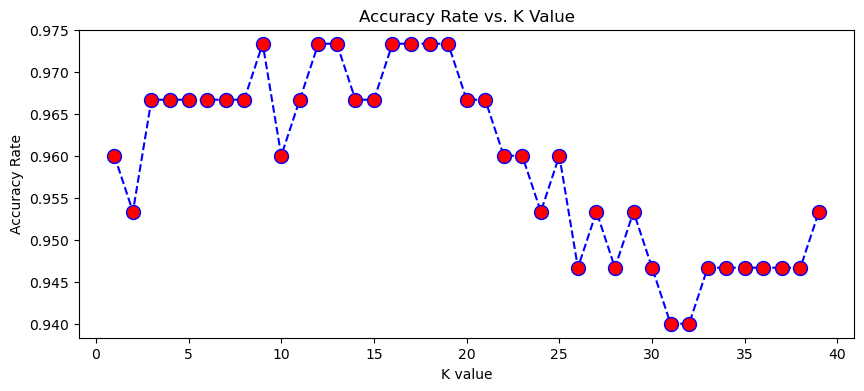

In [28]:
# Plotting Accuracy_rate Chart

plt.figure(figsize=(10,4))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Accuracy Rate')
plt.show()

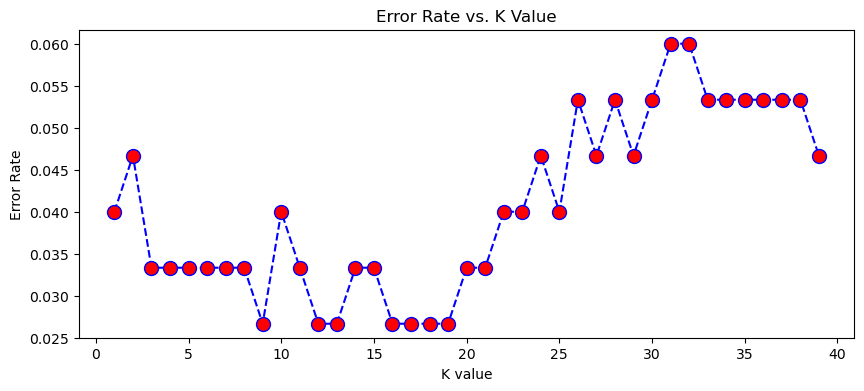

In [29]:
# Plotting Error_rate Chart

plt.figure(figsize=(10,4))
plt.plot(range(1,40),Error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.show()

# We can clearly see that best value of K is around 11 to 13, lets pick up any one.

In [30]:
# NOW WITH K=12

knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=12


[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
# with K = 1

KNN.score(X_test,y_test)

0.9473684210526315

In [31]:
# with K = 12

knn.score(X_test,y_test)

0.9736842105263158